### Install Scikit-Learn

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [2]:
import pandas as pd
import numpy as np

### Example of PCA

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/module_5_feature_engineering_demo.csv')

In [4]:
df.head()

,Unnamed: 0,Height,Weight,Calories_Intake,Exercise_Time,BMI,Age,Resting_Heart_Rate
0,0,187.640523,81.119254,1733.539473,4.593274,23.039374,70,54.540176
1,1,174.001572,87.849478,1644.014918,3.568722,29.015686,38,63.510746
2,2,179.787380,61.553704,2523.067529,2.885513,19.043018,76,49.502603
3,3,192.408932,72.094281,2020.812760,3.251630,19.473784,35,72.310220
4,4,188.675580,74.561067,2459.594194,1.789144,20.945017,49,67.864721


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df

,Height,Weight,Calories_Intake,Exercise_Time,BMI,Age,Resting_Heart_Rate
0,187.640523,81.119254,1733.539473,4.593274,23.039374,70,54.540176
1,174.001572,87.849478,1644.014918,3.568722,29.015686,38,63.510746
2,179.787380,61.553704,2523.067529,2.885513,19.043018,76,49.502603
3,192.408932,72.094281,2020.812760,3.251630,19.473784,35,72.310220
4,188.675580,74.561067,2459.594194,1.789144,20.945017,49,67.864721
...,...,...,...,...,...,...,...
995,174.128708,71.955016,3539.588332,2.496110,23.731234,36,58.531050
996,168.016011,98.030468,2046.267009,4.779559,34.726398,32,63.266300
997,170.941923,73.168677,2403.797896,2.969428,25.039637,20,52.155337
998,158.523891,47.161972,1893.742128,4.577088,18.767331,72,57.429598


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler() # minmaxScaler() scale values from 0 to 1, standard scaler convert data into zero-mean & unit variance
df_std = scaler.fit_transform(df) # the numpy array is produced by .fit_transform(). SO you need to convert the data back to dataframe

# note: in data pipeline, you should not use fit_transform, because if new data arrives, you should not 
# train the scaler again but using the pre-trained scaler directly

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio by each PC (Principal Component)
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio by the PCs
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca

Explained variance ratio: [0.28857346 0.18072185 0.14675488 0.14381463 0.13558216 0.10353415
 0.00101888]
Cumulative explained variance ratio: [0.28857346 0.46929531 0.61605019 0.75986482 0.89544697 0.99898112
 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.395268,-1.182948,1.791319,2.336967,0.037477,0.366259,-0.018202
1,0.819082,-0.205962,2.084828,0.028116,-0.058311,0.446441,-0.061576
2,-1.171866,-0.469183,-0.324207,1.639464,-0.240676,-0.935364,0.040073
3,-1.106793,0.798769,2.060352,0.535101,1.421538,0.537776,0.082936
4,-0.772500,1.500282,0.797973,0.753864,1.115887,-0.730499,0.036682
...,...,...,...,...,...,...,...
995,-0.165643,0.099869,-1.340951,-0.602825,1.845622,-0.771032,-0.014003
996,1.886786,-1.170308,1.479227,-0.279721,0.552471,1.200456,-0.024967
997,0.010300,-0.714905,0.840959,-1.300652,0.708702,-0.675074,-0.030753
998,-1.000008,-1.364828,-0.077991,0.531097,-2.030215,1.295974,-0.105292


### As shown above, we can drop the last 2 PC to still retain 90% of information / variance within the dataset for the model training

#### The features are not linearly correlated well so we cannot just use 2 or 3 PC to capture the majority of information (so PCA may not be the best scaler or good pre-processing choice in this case)

In [8]:
# Let's do the same, but now let's reduce to 2 components
# Perform PCA
pca = PCA(n_components = 0.80) # you can set it to retain the % of information or get the number of PC by n_components = 2
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.28857346 0.18072185 0.14675488 0.14381463 0.13558216]
Cumulative explained variance ratio: [0.28857346 0.46929531 0.61605019 0.75986482 0.89544697]


,0,1,2,3,4
0,-0.395268,-1.182948,1.791319,2.336967,0.037477
1,0.819082,-0.205962,2.084828,0.028116,-0.058311
2,-1.171866,-0.469183,-0.324207,1.639464,-0.240676
3,-1.106793,0.798769,2.060352,0.535101,1.421538
4,-0.772500,1.500282,0.797973,0.753864,1.115887


We can see that with the first 2 PC, only 47% of the varability in data is explained

In [9]:
pca.fit(df_std)
pca

PCA(n_components=0.8)

### Example of Feature Engineering with Pandas

In [10]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [11]:
bikes.head()
# holiday is boolean variable, 1 means it is a holiday, 0 means not holiday (similar to working day)
# weather shows severity of weather (1 means nice weather, 4 means bad weather)
# temp = tempature in celus. atemp = feeling temperature
# casual = # of bikes rented by casual users

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
# Transform datetime to a datetime data format as pandas assume 'datetime' to be string at the start
# you need to convert it into datetime manually
bikes['datetime'] = pd.to_datetime(bikes['datetime']) # you can use to_numeric to convert string into numeric type
bikes['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [13]:
# Extract hour, month, day into new columns
bikes['hour'] = bikes['datetime'].dt.hour
# get the hour in 24hr formate
bikes['hour']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int32

In [14]:
bikes['month'] = bikes['datetime'].dt.month
# get the month
bikes['month']

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: month, Length: 10886, dtype: int32

In [15]:
bikes['day'] = bikes['datetime'].dt.day
bikes['day'] # get day of month

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int32

In [16]:
# Create function to categorize the numeric variable
def total_cat(x):
    if x >= 0 and x < 10:
        return '0-10'
    elif x >= 10 and x < 50:
        return '10-50'
    elif x >= 50 and x < 100:
        return '50-100'
    else:
        return '100+'


In [17]:
# Create new column with rental count range using total_cat() function created above

bikes['rental_total_group'] = bikes['count'].apply(total_cat)
# this .apply() apples 'total_cat' function to each value in the bikes['count'] series


In [18]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,rental_total_group
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,10-50
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,10-50
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,10-50
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,10-50
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,0-10


In [19]:
# Create function with 2 inputs - temp and humidity - to classify good/bad days
def good_bad(temp,hum):
    if temp > 25 and hum > 70:
        return 'too hot'
    elif temp <=25 and hum >= 50 and hum <= 70:
        return 'so so day'
    else:
        return 'good day'


In [20]:
# when .apply() functions accepts 2 or more arguments, 
# and you use .apply on dataframe directly (not on series), you need to use lambda

bikes['day_type'] = bikes.apply(lambda x: good_bad(x['temp'], x['humidity']), axis=1) 
# axis = 1 means the function will look for 'temp' and 'humidity' horizontally, rather than vertically on the rows

In [21]:
# lambda x is equivalent to below
def func(x):
    good_bad(x['temp'], x['humanity'])

In [22]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,rental_total_group,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,10-50,good day
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,10-50,good day
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,10-50,good day
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,10-50,good day
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,0-10,good day


In [23]:
# Dummy variables - convert season to dummies; first - rename season

season_mapping = {1:'winter', 2:'spring', 3:'summer', 4:'fall'}
bikes['season'] = bikes['season'].map(season_mapping) # replace feature values by using dictionary
# note: map will give nan to a unspecified value. make sure your map dictionary covers all unique values in the feature


In [24]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,rental_total_group,day_type
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,10-50,good day
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,10-50,good day
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,10-50,good day
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,10-50,good day
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,0-10,good day


In [25]:
# Create season dummies
season_dummies = pd.get_dummies(bikes['season'])

In [26]:
season_dummies.head()

,fall,spring,summer,winter
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [27]:
# concatenate horizontally
bikes = pd.concat([bikes,season_dummies], axis=1)


In [28]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,hour,month,day,rental_total_group,day_type,fall,spring,summer,winter
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,...,16,0,1,1,10-50,good day,False,False,False,True
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,...,40,1,1,1,10-50,good day,False,False,False,True
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,...,32,2,1,1,10-50,good day,False,False,False,True
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,...,13,3,1,1,10-50,good day,False,False,False,True
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,...,1,4,1,1,0-10,good day,False,False,False,True


# Data Camp RFM

In [ ]:
# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # snapshot_date is the hypothetical today's date, this gives the recency value
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(datamart.head())


# Data Camp Feature Engineering

In [ ]:
# Create subset to only include the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int','float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)


# IN class exercise


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/module_5_feature_engineering_inclass.csv')
df.head()

,user_id,age,signup_date,last_purchase_date,total_purchases,total_spent,favorite_product_category,location,gender,email_domain
0,1,33,1978-11-01 17:03,2020-05-11 4:13,10,840.954993,books,Lake Gerald,female,gmail.com
1,2,32,2016-04-08 14:19,1959-01-07 5:45,2,1147.412095,books,North Justinburgh,male,yahoo.com
2,3,19,2021-03-08 7:01,2006-10-29 16:56,6,1301.284835,books,West Alec,female,yahoo.com
3,4,48,2006-01-11 11:04,1966-07-01 20:22,8,1404.261405,books,Annaton,male,hotmail.com
4,5,75,1985-06-16 1:41,2013-05-14 12:44,3,1968.752964,books,East Markburgh,female,yahoo.com


In [ ]:
df.drop('user_id', axis=1, inplace=True)
df

,age,signup_date,last_purchase_date,total_purchases,total_spent,favorite_product_category,location,gender,email_domain
0,33,1978-11-01 17:03,2020-05-11 4:13,10,840.954993,books,Lake Gerald,female,gmail.com
1,32,2016-04-08 14:19,1959-01-07 5:45,2,1147.412095,books,North Justinburgh,male,yahoo.com
2,19,2021-03-08 7:01,2006-10-29 16:56,6,1301.284835,books,West Alec,female,yahoo.com
3,48,2006-01-11 11:04,1966-07-01 20:22,8,1404.261405,books,Annaton,male,hotmail.com
4,75,1985-06-16 1:41,2013-05-14 12:44,3,1968.752964,books,East Markburgh,female,yahoo.com
...,...,...,...,...,...,...,...,...,...
995,69,1994-01-02 1:26,2002-12-06 1:07,48,1395.669474,home,Cynthiaborough,female,gmail.com
996,35,1957-10-19 19:41,1977-07-19 0:45,45,131.001416,electronics,North Christopherside,female,gmail.com
997,49,1970-01-23 0:10,1986-11-01 4:45,38,102.663709,electronics,Castroland,male,hotmail.com
998,61,2016-02-26 21:04,1952-01-11 10:28,12,1022.037997,clothing,Salasmouth,female,hotmail.com


In [ ]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date']) # you can use to_numeric to convert string into numeric type
df['signup_date'] = pd.to_datetime(df['signup_date'])
df[df['last_purchase_date'] > '2000-01-11']

,age,signup_date,last_purchase_date,total_purchases,total_spent,favorite_product_category,location,gender,email_domain,last_purchase_year
0,33,1978-11-01 17:03:00,2020-05-11 04:13:00,10,840.954993,books,Lake Gerald,female,gmail.com,2020
2,19,2021-03-08 07:01:00,2006-10-29 16:56:00,6,1301.284835,books,West Alec,female,yahoo.com,2006
4,75,1985-06-16 01:41:00,2013-05-14 12:44:00,3,1968.752964,books,East Markburgh,female,yahoo.com,2013
7,57,1979-12-24 05:37:00,2008-09-10 15:42:00,18,1739.610644,electronics,Antonioview,female,yahoo.com,2008
12,33,1972-02-11 13:36:00,2010-12-15 07:08:00,2,298.228211,books,West Ericaburgh,male,hotmail.com,2010
...,...,...,...,...,...,...,...,...,...,...
980,30,1983-08-15 19:22:00,2001-02-13 05:32:00,24,562.129398,clothing,North Diana,male,gmail.com,2001
982,73,2004-03-08 18:17:00,2009-05-20 11:05:00,5,1176.104173,beauty,New Allison,female,gmail.com,2009
994,28,1993-10-25 13:32:00,2002-09-02 13:52:00,1,912.918996,beauty,Crystalside,female,hotmail.com,2002
995,69,1994-01-02 01:26:00,2002-12-06 01:07:00,48,1395.669474,home,Cynthiaborough,female,gmail.com,2002


In [ ]:
df['last_purchase_year'] = df['last_purchase_date'].dt.year
# get the month
df['last_purchase_year']

0      2020
1      1959
2      2006
3      1966
4      2013
       ... 
995    2002
996    1977
997    1986
998    1952
999    2010
Name: last_purchase_year, Length: 1000, dtype: int64

In [ ]:
df['signup_year'] = df['signup_date'].dt.year
df['user_year'] = df['last_purchase_year'] - df['signup_year']
df['user_year']

0      42
1     -57
2     -15
3     -40
4      28
       ..
995     8
996    20
997    16
998   -64
999    28
Name: user_year, Length: 1000, dtype: int64

In [ ]:
# drop out negative user year
df = df[df['user_year']>= 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        495 non-null    int64         
 1   signup_date                495 non-null    datetime64[ns]
 2   last_purchase_date         495 non-null    datetime64[ns]
 3   total_purchases            495 non-null    int64         
 4   total_spent                495 non-null    float64       
 5   favorite_product_category  495 non-null    object        
 6   location                   495 non-null    object        
 7   gender                     495 non-null    object        
 8   email_domain               495 non-null    object        
 9   last_purchase_year         495 non-null    int64         
 10  signup_year                495 non-null    int64         
 11  user_year                  495 non-null    int64         
dtypes: datet

In [ ]:
# Create function to categorize the numeric variable
def age_cat(x):
    if x >= 0 and x < 30:
        return 'young adult'
    elif x >= 30 and x < 60:
        return 'adult'
    elif x >= 60 and x < 100:
        return 'senior'
    else:
        return 'problem'


In [ ]:
df['age_cat'] = df['age'].apply(age_cat)
# this .apply() apples 'total_cat' function to each value in the bikes['count'] series
df['age_cat'] 

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_458/3391234222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_cat'] = df['age'].apply(age_cat)


0            adult
4           senior
5           senior
7            adult
8            adult
          ...     
994    young adult
995         senior
996          adult
997          adult
999          adult
Name: age_cat, Length: 495, dtype: object

In [ ]:
df.describe()

,age,total_purchases,total_spent,last_purchase_year,signup_year,user_year
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,50.636364,24.553535,1022.522917,1998.874747,1973.939394,24.935354
std,17.994969,14.134285,568.168654,16.322052,16.758838,17.290559
min,18.000000,1.000000,21.674472,1955.000000,1950.000000,0.000000
25%,35.000000,12.000000,514.002055,1987.000000,1959.500000,11.000000
50%,51.000000,23.000000,1039.950634,2002.000000,1972.000000,21.000000
75%,66.000000,38.000000,1479.454801,2012.000000,1986.000000,37.000000
max,79.000000,49.000000,1999.004071,2023.000000,2020.000000,72.000000


In [ ]:
# find valueable customer if they buy a lot and spend highly (above 75% customer)
def good_bad_c(purchase,spent):
    if purchase > 38 and spent > 1480:
        return 'value customer'
    else:
        return 'ok customer'

In [ ]:

df['customer_type'] = df.apply(lambda x: good_bad_c(x['total_purchases'], x['total_spent']), axis=1) 
# axis must be 1 to tell that 'total_purchases' in x['total_purchases'] is refering to the column not the row


/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_458/1226475337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_type'] = df.apply(lambda x: good_bad_c(x['total_purchases'], x['total_spent']), axis=1)


In [ ]:
df.apply(lambda x: good_bad_c(x['total_purchases'], x['total_spent']), axis=1) # axis = 1 here is essential

0         ok customer
4         ok customer
5      value customer
7         ok customer
8         ok customer
            ...      
994       ok customer
995       ok customer
996       ok customer
997       ok customer
999       ok customer
Length: 495, dtype: object

<Axes: >

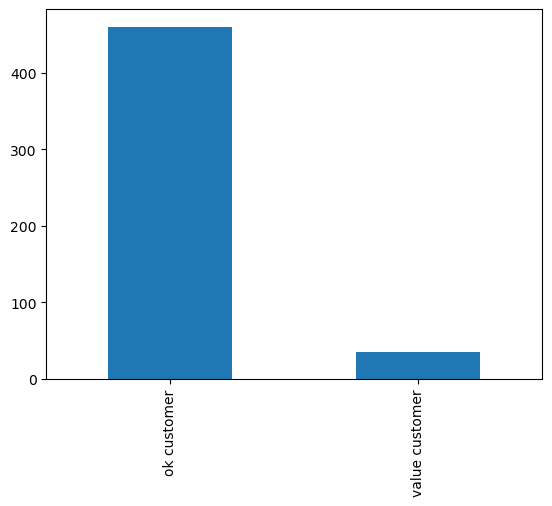

In [ ]:
df['customer_type'].value_counts().plot(kind='bar')

In [ ]:
# dummy email address